In [41]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns #for styling the plots


import geopandas as gpd
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import DBSCAN

## Load data

In [ ]:
# to do: load all datasets here

In [50]:
evic = pd.read_csv('Data_clean/yearly_evic_per1000_cd.csv')
evic.drop(columns=['Unnamed: 0', 'Community District'], inplace=True)

race = pd.read_csv('Data_clean/race_geo_clean.csv')

,Year,Evic_rt,CD_ID
0,2013,43.711095,101
1,2014,35.407584,101
2,2015,28.157475,101
3,2016,26.383320,101
4,2017,22.314438,101
...,...,...,...
285,2013,63.054351,407
286,2014,57.068165,407
287,2015,54.261820,407
288,2016,48.648503,407


In [56]:
drop_cols = ['CD_ID', 'White', 'Latino', 'Black', 'Asian', 'Other']
df = evic.merge(race, left_on=['CD_ID', 'Year'], right_on=['LocationId', 'Year']).drop(columns=drop_cols, inplace=False)
df

,Year,Evic_rt,LocationId,%White,%Latino,%Black,%Asian,%Other,max_race
0,2013,43.711095,101,0.71920,0.06831,0.02233,0.15648,0.03368,White
1,2014,35.407584,101,0.72273,0.06887,0.02319,0.15057,0.03464,White
2,2015,28.157475,101,0.71679,0.06837,0.02263,0.15731,0.03490,White
3,2016,26.383320,101,0.71615,0.06966,0.02227,0.15905,0.03288,White
4,2017,22.314438,101,0.72039,0.06416,0.02304,0.15709,0.03532,White
...,...,...,...,...,...,...,...,...,...
285,2013,63.054351,407,0.28818,0.17420,0.01910,0.49045,0.02806,Asian
286,2014,57.068165,407,0.28154,0.16930,0.01955,0.50286,0.02675,Asian
287,2015,54.261820,407,0.27036,0.17063,0.02009,0.51300,0.02591,Asian
288,2016,48.648503,407,0.25559,0.17569,0.02142,0.52176,0.02554,Asian


## Correlation

In [ ]:
# important: choose variables from the corr. output

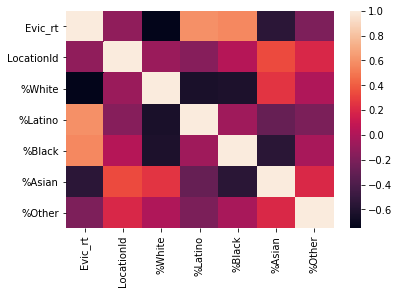

In [58]:
sns.heatmap(df.drop(columns='Year').corr())

## Linear regression

In [ ]:
# to do

In [ ]:
# univariate vs multivariate analysis

## Clustering

In [ ]:
# IMPORTANT: how to decide if gm / kmeans / dbscan... 

In [60]:
df.head()

,Year,Evic_rt,LocationId,%White,%Latino,%Black,%Asian,%Other,max_race
0,2013,43.711095,101,0.71920,0.06831,0.02233,0.15648,0.03368,White
1,2014,35.407584,101,0.72273,0.06887,0.02319,0.15057,0.03464,White
2,2015,28.157475,101,0.71679,0.06837,0.02263,0.15731,0.03490,White
3,2016,26.383320,101,0.71615,0.06966,0.02227,0.15905,0.03288,White
4,2017,22.314438,101,0.72039,0.06416,0.02304,0.15709,0.03532,White


In [61]:
df_grouped = df.groupby(by='LocationId').mean().drop(columns='Year')
df_grouped.head()

,Evic_rt,%White,%Latino,%Black,%Asian,%Other
LocationId,,,,,,
101,31.194782,0.719052,0.067874,0.022692,0.156100,0.034284
102,28.941069,0.719052,0.067874,0.022692,0.156100,0.034284
103,36.841578,0.325986,0.247874,0.073258,0.321382,0.031498
104,36.255489,0.612156,0.148154,0.055944,0.153878,0.029870
105,27.107979,0.612156,0.148154,0.055944,0.153878,0.029870


In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,20)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(df_grouped)
    #report average Silhouette score
    silhouette_avg = silhouette_score(df_grouped, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.6631065456269508
For n_clusters =3, the average silhouette_score is :0.6481202380459198
For n_clusters =4, the average silhouette_score is :0.6545702952197738
For n_clusters =5, the average silhouette_score is :0.6543559357246764
For n_clusters =6, the average silhouette_score is :0.6576563355338935
For n_clusters =7, the average silhouette_score is :0.6768861291230385
For n_clusters =8, the average silhouette_score is :0.7059091303468139
For n_clusters =9, the average silhouette_score is :0.6937186906859555
For n_clusters =10, the average silhouette_score is :0.6622145352718898
For n_clusters =11, the average silhouette_score is :0.6604634007051898
For n_clusters =12, the average silhouette_score is :0.661444819071158
For n_clusters =13, the average silhouette_score is :0.6488753193405385
For n_clusters =14, the average silhouette_score is :0.6666864085419211
For n_clusters =15, the average silhouette_score is :0.6758977369597875
F

In [80]:
# nr of clusters
k = 8

# apply clustering to city locations based on activity proportion
gm = GaussianMixture(n_components=k,random_state=324).fit(df_grouped)
gm.labels_ = gm.predict(df_grouped) # get labels

result = pd.DataFrame({'LocationId': df_grouped.index, 'label': gm.labels_}).reset_index(drop=True)
result.head()

,LocationId,label
0,101,7
1,102,7
2,103,1
3,104,1
4,105,7


In [81]:
cd = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Community_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson')

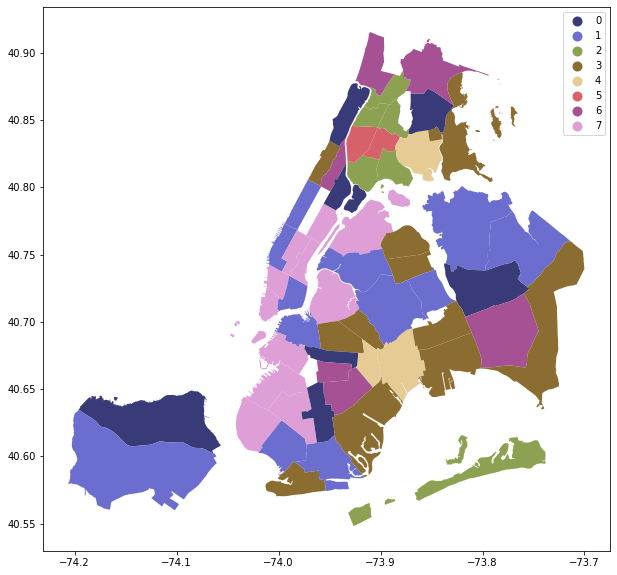

In [89]:
#visualize the clustering together with the categorical activity ridership of each cluster
result['label'] = result['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))

cd.merge(result,left_on='BoroCD',right_on='LocationId',how='left').plot(column='label',cmap='tab20b', 
                                    legend=True,ax=ax)

In [83]:
cd = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Community_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson')
dfGeo = cd.merge(df,left_on='BoroCD',right_on='LocationId',how='left')
dfGeo.head()

,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry,Year,Evic_rt,LocationId,%White,%Latino,%Black,%Asian,%Other,max_race
0,1,101,4.268909e+07,74168.382652,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",2013.0,43.711095,101.0,0.71920,0.06831,0.02233,0.15648,0.03368,White
1,1,101,4.268909e+07,74168.382652,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",2014.0,35.407584,101.0,0.72273,0.06887,0.02319,0.15057,0.03464,White
2,1,101,4.268909e+07,74168.382652,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",2015.0,28.157475,101.0,0.71679,0.06837,0.02263,0.15731,0.03490,White
3,1,101,4.268909e+07,74168.382652,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",2016.0,26.383320,101.0,0.71615,0.06966,0.02227,0.15905,0.03288,White
4,1,101,4.268909e+07,74168.382652,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",2017.0,22.314438,101.0,0.72039,0.06416,0.02304,0.15709,0.03532,White


In [84]:
clusters = dfGeo.reset_index().merge(result,left_on='BoroCD',right_on='LocationId').\
                groupby(['label']).sum().reset_index(drop=True)
clusters

,index,OBJECTID,BoroCD,Shape__Area,Shape__Length,Year,Evic_rt,LocationId_x,%White,%Latino,%Black,%Asian,%Other,LocationId_y
0,5600,1245,9825,4.785041e+09,2.364819e+06,70525.0,4421.427991,9825.0,9.26928,11.81688,9.33404,3.64708,0.93279,9825
1,10410,2330,18875,1.039216e+10,4.745358e+06,120900.0,2481.246606,18875.0,29.68063,10.92792,3.15869,14.81269,1.42005,18875
2,3390,740,7175,2.265215e+09,2.048674e+06,60450.0,6507.948932,7175.0,2.60205,18.00203,8.28237,0.68193,0.43169,7175
3,10420,2305,17980,7.299654e+09,5.059271e+06,110825.0,4545.071512,17980.0,12.27602,18.67465,14.34172,7.44050,2.26712,17980
4,2250,495,4150,1.607587e+09,8.017503e+05,30225.0,2643.158797,4150.0,0.44135,5.80157,7.83812,0.61502,0.30395,4150
5,755,165,2035,5.017480e+08,3.239390e+05,20150.0,2584.334365,2035.0,0.30352,6.36680,3.06040,0.12515,0.14415,2035
6,4540,990,7840,3.462617e+09,1.534198e+06,60450.0,4616.751474,7840.0,3.78795,6.26511,17.77107,1.27000,0.90582,7840
7,5490,1235,12295,4.608956e+09,3.333731e+06,110825.0,1597.023210,12295.0,33.94959,9.14615,2.00903,8.43347,1.46183,12295


In [87]:
sel_cols = ['Evic_rt', '%White', '%Latino', '%Black', '%Asian', '%Other']
clusters = clusters[sel_cols]

# normalize values
clusters_norm = clusters.div(clusters.sum(axis=1), axis=0)
clusters_norm['label'] = range(8)
clusters_norm

,Evic_rt,%White,%Latino,%Black,%Asian,%Other,label
0,0.992146,0.002080,0.002652,0.002095,0.000818,0.000209,0
1,0.976390,0.011680,0.004300,0.001243,0.005829,0.000559,1
2,0.995411,0.000398,0.002753,0.001267,0.000104,0.000066,2
3,0.988044,0.002669,0.004060,0.003118,0.001617,0.000493,3
4,0.994357,0.000166,0.002183,0.002949,0.000231,0.000114,4
5,0.996145,0.000117,0.002454,0.001180,0.000048,0.000056,5
6,0.993544,0.000815,0.001348,0.003824,0.000273,0.000195,6
7,0.966707,0.020550,0.005536,0.001216,0.005105,0.000885,7


In [ ]:
# PROBLEMITA: evict rate values are too high compared to %race

Text(0, 0.5, 'variable%')

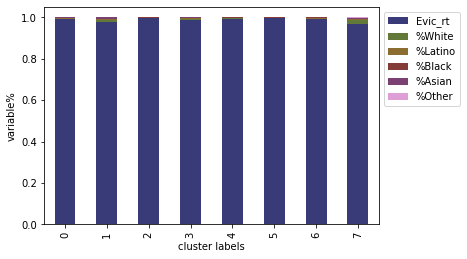

In [90]:
# plot bar

clusters_norm[sel_cols].plot.bar(stacked=True, cmap='tab20b')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xlabel('cluster labels')
plt.ylabel('variable%')